# Analysis

The main thing we'll go through today is analysis of the Demo Experiment data. We have data from 8 participants who completed the experiment.

**Before we can start:**

**a**) [Download the demographics data](demo_demog.csv) as a `.csv` file, and place it in a directory that makes sense for you (e.g., called "demo_analysis").

**b**) [Download the stimuli](demo_stimuli.csv) as a `.csv` file, and place it in the same demo analysis folder.

**c**) [Download the raw trials data](demo_data.zip) as a `.zip` file.

**d**) Extract the `data` folder from the `.zip` file and put it in your demo analysis folder.

**e**) Start a new R script in RStudio, and save the `.R` file to the demo analysis folder.

After following these instructions, you should have a directory structure that looks something like this:

```
demo_analysis
├─ data
│  ├─ trials_p171220.csv
│  ├─ trials_p203530.csv
│  └─ ...
├─ analysis.R
└─ demo_demog.csv
└─ demo_stimuli.csv
```

Once everyone has completed these steps, we'll begin...

## Loading the Data

#### 1: Load the Relevant Libraries

These are the libraries we'll use for the analysis. Each library has a comment explaining what we will use it for.

In [1]:
options(repr.plot.width=3.5, repr.plot.height=3)
library(ggplot2)
theme_set(theme_classic() + theme(legend.position="top"))

In [2]:
library(readr)    # for reading the data into R
library(purrr)    # for easily importing multiple files
library(dplyr)    # for wrangling data (e.g., adding/renaming columns)

library(ggplot2)  # for visualising data


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### 2. Import the Demographic Data

First, we import the demographics data. This gives us some details about the participants who took part.

In [3]:
demog <- read_csv("demo_demog.csv")

Rows: 9 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): participant_id, gender, dominant_hand, first_language
dbl (3): age, frame_rate_Hz, total_time_secs

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


This will print some details about the columns imported. Let's have a look at the data we imported. We have some missing data, but enough information to report age and gender information.

In [4]:
demog

participant_id,age,gender,dominant_hand,first_language,frame_rate_Hz,total_time_secs
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
p171220,18,female,right,german,60.93062,720.8187
p203530,23,female,right,german,60.14155,544.3295
p209846,23,male,right,german,59.94025,775.5403
p215942,27,female,right,other,59.85515,734.7305
p233174,22,male,left,german,NA,597.8216
p331426,20,female,right,german,59.16292,784.9782
p498198,22,female,left,german,59.87221,837.8138
p699576,20,male,right,german,60.02556,1008.8191
p908815,19,male,right,german,60.05083,-Inf


In [5]:
demog |> print()

# A tibble: 9 x 7
  participant_id   age gender dominant_hand first_language frame_rate_Hz
  <chr>          <dbl> <chr>  <chr>         <chr>                  <dbl>
1 p171220           18 female right         german                  60.9
2 p203530           23 female right         german                  60.1
3 p209846           23 male   right         german                  59.9
4 p215942           27 female right         other                   59.9
5 p233174           22 male   left          german                  NA  
6 p331426           20 female right         german                  59.2
7 p498198           22 female left          german                  59.9
8 p699576           20 male   right         german                  60.0
9 p908815           19 male   right         german                  60.1
# i 1 more variable: total_time_secs <dbl>


#### 3: Import the Stimuli

Next we import the list of stimuli:

In [6]:
stim <- read_csv("demo_stimuli.csv")

stim

Rows: 300 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): condition, text, corr_ans
dbl (4): item_nr, snd, ZipfSUBTLEX, word_len
lgl (1): is_practice_trial

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


item_nr,condition,text,corr_ans,is_practice_trial,snd,ZipfSUBTLEX,word_len
<dbl>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>
1,word,Akzente,ralt,FALSE,0.7164028,2.71,7
1,pseudoword,Unwante,lalt,FALSE,0.5337820,NA,7
2,word,Drücker,ralt,FALSE,0.5730488,3.01,7
2,pseudoword,quokker,lalt,FALSE,0.5511313,NA,7
3,word,Erwachsener,ralt,FALSE,0.6809480,3.95,11
3,pseudoword,Exzingsener,lalt,FALSE,0.5324633,NA,11
4,word,Exorzisten,ralt,FALSE,0.6235078,2.64,10
4,pseudoword,ucinzisten,lalt,FALSE,0.4170587,NA,10
5,word,Fabel,ralt,FALSE,0.6343845,2.60,5


In [7]:
stim |> print()

# A tibble: 300 x 8
   item_nr condition text  corr_ans is_practice_trial   snd ZipfSUBTLEX word_len
     <dbl> <chr>     <chr> <chr>    <lgl>             <dbl>       <dbl>    <dbl>
 1       1 word      Akze~ ralt     FALSE             0.716        2.71        7
 2       1 pseudowo~ Unwa~ lalt     FALSE             0.534       NA           7
 3       2 word      Drüc~ ralt     FALSE             0.573        3.01        7
 4       2 pseudowo~ quok~ lalt     FALSE             0.551       NA           7
 5       3 word      Erwa~ ralt     FALSE             0.681        3.95       11
 6       3 pseudowo~ Exzi~ lalt     FALSE             0.532       NA          11
 7       4 word      Exor~ ralt     FALSE             0.624        2.64       10
 8       4 pseudowo~ ucin~ lalt     FALSE             0.417       NA          10
 9       5 word      Fabel ralt     FALSE             0.634        2.6         5
10       5 pseudowo~ Pafel lalt     FALSE             0.552       NA           5
# i 290 

This has 8 columns:

* `item_nr` - an ID for each matched pair of words and pseudowords

* `condition` - whether each item is a `"word"` or `"pseudoword"`

* `text` - the text shown to the participant

* `corr_ans` - whether the correct answer was to press the left alt key (`"lalt"`) or the right alt key (`"ralt"`)

* `snd` - semantic neighbourhood density, calculated using the fastText model, using the method described by Hendrix & Sun ([2020](https://doi.org/10.1037/xlm0000819))

* `ZipfSUBTLEX` - a measure of word frequency from a german subtitle corpus: SUBTLEX-DE (Bysbaert et al., [2011](https://doi.org/10.1027/1618-3169/a000123)). For more info on the "Zipf" measure, see Brysbaert et al. ([2017](
https://doi.org/10.1177/096372141772752))

* `word_len` - number of letters in the word / pseudoword

#### 4: Import the Raw Data

Let's import the experiment data from the `data` folder:

In [8]:
# first, get a list of all .csv data files
data_paths <- list.files("data", pattern=".*\\.csv$", full.names=TRUE)

# now, iterate over these with `read_csv()` to import each
raw_data <- map_df(data_paths, read_csv)

# print the contents
raw_data

Rows: 310 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): participant_id, condition, text, resp
dbl (3): item_nr, rt_ms, time_so_far_secs
lgl (1): is_practice_trial

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 310 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): participant_id, condition, text, resp
dbl (3): item_nr, rt_ms, time_so_far_secs
lgl (1): is_practice_trial

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 310 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): participant_id, condition, text, resp
dbl (3): item_nr, rt_ms, time_so_far_secs
lgl (1): is_practi

participant_id,item_nr,condition,text,is_practice_trial,resp,rt_ms,time_so_far_secs
<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>
p171220,4,pseudoword,segt,TRUE,lalt,887.1145,34.90737
p171220,4,word,sagt,TRUE,ralt,682.5982,37.31386
p171220,5,pseudoword,tobreren,TRUE,lalt,751.4031,39.54651
p171220,1,pseudoword,Bage,TRUE,lalt,529.5305,41.86358
p171220,3,pseudoword,Torrerk,TRUE,lalt,551.4779,43.93993
p171220,3,word,korrekt,TRUE,ralt,489.4925,46.05284
p171220,2,pseudoword,sanzes,TRUE,lalt,455.5583,48.10536
p171220,2,word,Mannes,TRUE,lalt,565.0679,50.11874
p171220,1,word,Haie,TRUE,ralt,632.8114,52.23046


In [9]:
raw_data |> print()

# A tibble: 2,480 x 8
   participant_id item_nr condition  text     is_practice_trial resp  rt_ms
   <chr>            <dbl> <chr>      <chr>    <lgl>             <chr> <dbl>
 1 p171220              4 pseudoword segt     TRUE              lalt   887.
 2 p171220              4 word       sagt     TRUE              ralt   683.
 3 p171220              5 pseudoword tobreren TRUE              lalt   751.
 4 p171220              1 pseudoword Bage     TRUE              lalt   530.
 5 p171220              3 pseudoword Torrerk  TRUE              lalt   551.
 6 p171220              3 word       korrekt  TRUE              ralt   489.
 7 p171220              2 pseudoword sanzes   TRUE              lalt   456.
 8 p171220              2 word       Mannes   TRUE              lalt   565.
 9 p171220              1 word       Haie     TRUE              ralt   633.
10 p171220              5 word       sicheren TRUE              ralt   589.
# i 2,470 more rows
# i 1 more variable: time_so_far_secs <dbl>


This gives us one data frame with all trials in the experiment.

There are 9 columns of data:

* `participant_id` - a unique ID for each paricipant

* `item_nr`- the same item ID as in `stim`

* `condition` - whether the trial showed a `"word"` or `"pseudoword"`

* `text` - the text that the participant saw

* `is_practice_trial` - whether each trial was a practice trial. The first 10 trials for each participant will be practice trials.

* `resp` - left alt key (`"lalt"`) or the right alt key (`"ralt"`)

#### 5: Join the Data Together

The easiest way to work with small datasets like this is to just join the dataframes together. This will create some redundancy (e.g., participant ages will be repeated 300 times), but can make things easier to work with.

Here we use `left_join()` to find add information about participant demographics and features of the stimuli. This identifies rows that the dataframes have in common, and joins them togeher. Notice that we now have one big dataframe with all of the information about every trial.

In [10]:
all_dat <- raw_data |>
  left_join(demog) |>
  left_join(stim)

Joining with `by = join_by(participant_id)`
Joining with `by = join_by(item_nr, condition, text, is_practice_trial)`


In [11]:
all_dat

participant_id,item_nr,condition,text,is_practice_trial,resp,rt_ms,time_so_far_secs,age,gender,dominant_hand,first_language,frame_rate_Hz,total_time_secs,corr_ans,snd,ZipfSUBTLEX,word_len
<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
p171220,4,pseudoword,segt,TRUE,lalt,887.1145,34.90737,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA
p171220,4,word,sagt,TRUE,ralt,682.5982,37.31386,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA
p171220,5,pseudoword,tobreren,TRUE,lalt,751.4031,39.54651,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA
p171220,1,pseudoword,Bage,TRUE,lalt,529.5305,41.86358,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA
p171220,3,pseudoword,Torrerk,TRUE,lalt,551.4779,43.93993,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA
p171220,3,word,korrekt,TRUE,ralt,489.4925,46.05284,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA
p171220,2,pseudoword,sanzes,TRUE,lalt,455.5583,48.10536,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA
p171220,2,word,Mannes,TRUE,lalt,565.0679,50.11874,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA
p171220,1,word,Haie,TRUE,ralt,632.8114,52.23046,18,female,right,german,60.93062,720.8187,NA,NA,NA,NA


In [12]:
all_dat |> print()

# A tibble: 2,480 x 18
   participant_id item_nr condition  text     is_practice_trial resp  rt_ms
   <chr>            <dbl> <chr>      <chr>    <lgl>             <chr> <dbl>
 1 p171220              4 pseudoword segt     TRUE              lalt   887.
 2 p171220              4 word       sagt     TRUE              ralt   683.
 3 p171220              5 pseudoword tobreren TRUE              lalt   751.
 4 p171220              1 pseudoword Bage     TRUE              lalt   530.
 5 p171220              3 pseudoword Torrerk  TRUE              lalt   551.
 6 p171220              3 word       korrekt  TRUE              ralt   489.
 7 p171220              2 pseudoword sanzes   TRUE              lalt   456.
 8 p171220              2 word       Mannes   TRUE              lalt   565.
 9 p171220              1 word       Haie     TRUE              ralt   633.
10 p171220              5 word       sicheren TRUE              ralt   589.
# i 2,470 more rows
# i 11 more variables: time_so_far_secs <dbl>

## Cleaning Data

Now that we have the data loaded and all in one place, we need to exclude participants and trials that do not meet our exclusion criteria. This can be a useful step for (e.g.,) catching participants who were not paying attention, or removing outliers from your data.

Before the experiment, I decided to exclude:

* participants who had average accuracies <= 75% (too inaccurate)

* participants who had median response times <250 ms (too fast)

* participants who had median response times >1500 ms (too slow)

* participants whose first language is not German

* practice trials

* trials responded to incorrectly (as we are interested in response times only in our analysis)

#### 1: Calculate Accuracies

First, let's create a column of participant accuracies. Wherever the `resp` column is equal to the `corr_ans` column, we will put a 1. Otherwise, we will put a zero.

In [13]:
all_dat <- mutate(all_dat, accuracy = ifelse(corr_ans == resp, 1, 0))

#### 2: Summarise Participants

Now, we want to calculate per average response time and accuracy for each participant. Since response time is such a skewed distribution, we will calculate the median for response times.

> Note: We include `first_language` in `group_by()` so that this is included in the per-participant summary, even though each participant has only one value.

In [14]:
participant_avg <- all_dat |>
  # exclude practice trials
  filter(!is_practice_trial) |>
  # then, for each participant, record their first language, and
  group_by(participant_id, first_language) |>
  # get their average RT and accuracy
  summarise(
    median_rt = median(rt_ms),
    mean_acc = mean(accuracy)
  ) |>
  # (often good practice to ungroup)
  ungroup()

participant_avg

`summarise()` has grouped output by 'participant_id'. You can override using
the `.groups` argument.


participant_id,first_language,median_rt,mean_acc
<chr>,<chr>,<dbl>,<dbl>
p171220,german,741.9733,0.9566667
p203530,german,540.0705,0.9400000
p209846,german,977.2635,0.9200000
p215942,other,1000.5606,0.8966667
p233174,german,596.6183,0.8633333
p331426,german,762.4101,0.9400000
p498198,german,792.4349,0.9566667
p699576,german,624.2055,0.9000000


In [15]:
participant_avg |> print()

# A tibble: 8 x 4
  participant_id first_language median_rt mean_acc
  <chr>          <chr>              <dbl>    <dbl>
1 p171220        german              742.    0.957
2 p203530        german              540.    0.94 
3 p209846        german              977.    0.92 
4 p215942        other              1001.    0.897
5 p233174        german              597.    0.863
6 p331426        german              762.    0.94 
7 p498198        german              792.    0.957
8 p699576        german              624.    0.9  


#### 3: Identify Good Participants

Now, we can identify participants which are suitable for our hypotheses. When I originally designed the experiment, I decided to include:

* only participants who had accuracies and response times within our cutoffs

* only participants whose first language is German

Here, we filter the dataframe of participant averages, and then make not of all the participants who meet our criteria. We store the list of good participants in `okay_participants`.

> Note: the `pull()` function extracts data from a column, and puts it in a vector for us

In [16]:
okay_participants <- participant_avg |>
  filter(mean_acc>0.75, median_rt>=250, median_rt<1500, first_language=="german") |>
  pull(participant_id)

okay_participants

[1] "p171220" "p203530" "p209846" "p233174" "p331426" "p498198" "p699576"

#### 4: Clean Data

Now we:

* apply our participant exclusions

* exclude trials that were responded to incorrectly

* exclude practice trials

We store the trials which we will use in the analysis in `trials_clean`

In [17]:
trials_clean <- all_dat |>
  filter(
    # only keep participants that meet inclusion criteria
    participant_id %in% okay_participants,
    # only keep correct trials
    accuracy == 1,
    # remove practice trials
    # (note: the exclamation mark ! can be read as "is not")
    !is_practice_trial
  )

## Analysis - Frequency Effect

Can we replicate the effect of frequency? Let's see what the effect of Zipf is on lexical decision response times!

#### 1: Calculate Word Averages

Here, we calculate the average RT and accuracy for each word. We also make sure that the Zipf values are brought through by including them in the `group_by()` function.

In [18]:
word_averages <- trials_clean |>
  filter(condition == "word") |>
  group_by(text, ZipfSUBTLEX) |>
  summarise(
    median_rt = median(rt_ms),
    mean_acc = mean(accuracy)
  ) |>
  ungroup()

word_averages

`summarise()` has grouped output by 'text'. You can override using the
`.groups` argument.


text,ZipfSUBTLEX,median_rt,mean_acc
<chr>,<dbl>,<dbl>,<dbl>
Akzente,2.71,628.2463,1
Drücker,3.01,598.8304,1
Erwachsener,3.95,636.2265,1
Exorzisten,2.64,744.7074,1
Fabel,2.60,641.4402,1
Faulpelze,2.74,602.9854,1
Figuren,4.38,525.4853,1
Filigrane,1.90,970.5680,1
Geschicke,2.07,717.0423,1


In [19]:
word_averages |> print()

# A tibble: 150 x 4
   text        ZipfSUBTLEX median_rt mean_acc
   <chr>             <dbl>     <dbl>    <dbl>
 1 Akzente            2.71      628.        1
 2 Drücker            3.01      599.        1
 3 Erwachsener        3.95      636.        1
 4 Exorzisten         2.64      745.        1
 5 Fabel              2.6       641.        1
 6 Faulpelze          2.74      603.        1
 7 Figuren            4.38      525.        1
 8 Filigrane          1.9       971.        1
 9 Geschicke          2.07      717.        1
10 Gondel             3.11      698.        1
# i 140 more rows


Clearly, accuracy is overall very high, but we have some variability in the response times.

#### 2: Code the Frequency Variable

Word frequency (`ZipfSUBTLEX`) is stored as a continuous variable. We can fit our model without doing any coding, but then it will be harder to interpret our model intercept. It is often useful to mean-centre variables, so that the model intercept can be interpreted as the grand average (e.g., the average RT overall).

Let's calculate mean-centred Zipf frequency, and store in `ZipfSUBTLEX_cent`.

In [20]:
word_averages <- word_averages |>
  mutate(ZipfSUBTLEX_cent = ZipfSUBTLEX - mean(ZipfSUBTLEX))

#### 3: Estimate the Frequency Effect

Now we can fit a linear model to predict average item response times as a function of mean-centred word frequency.

In [21]:
freq_mod <- lm(median_rt ~ ZipfSUBTLEX_cent, data = word_averages)

summary(freq_mod)


Call:
lm(formula = median_rt ~ ZipfSUBTLEX_cent, data = word_averages)

Residuals:
    Min      1Q  Median      3Q     Max 
-237.96  -92.19  -15.80   52.61  476.65 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        682.95      10.35  66.007  < 2e-16 ***
ZipfSUBTLEX_cent   -71.20      10.45  -6.813 2.24e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 126.7 on 148 degrees of freedom
Multiple R-squared:  0.2388,	Adjusted R-squared:  0.2336 
F-statistic: 46.42 on 1 and 148 DF,  p-value: 2.243e-10


This tells us that the average RT overall was 682.95 ms (*SE* = 10.35). The *t* value of >66 just reflects that this number is much larger than zero. We would report the overall average RT, but we probably wouldn't report the *t* and *p* values for this, since RT is almost by definition larger than zero.

The second coefficient is more interesting. The $\Beta$ = -71.2 (*SE* = 10.45) tells us that for every one unit of Zipf, RT becomes 71.2 ms faster on average. This effect is significantly different from zero (*t*(148) = -6.81, *p* < .001).

We might also want to report the R$^2$ value of .24, which means that our model is accounting for an estimated 24% of variance in the data.

Finally, we might want to make a nice plot of the effect. We will be spending more time on this in a future session, but here is an example, showing the effect of frequency on response time.

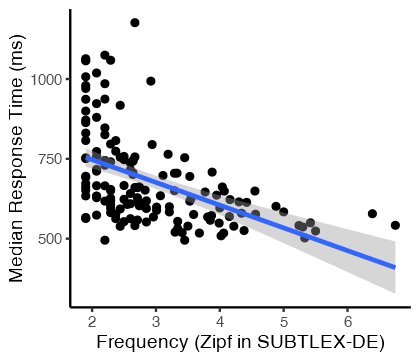

In [22]:
word_averages |>
  ggplot(aes(ZipfSUBTLEX, median_rt)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y~x) +
  labs(
    x = "Frequency (Zipf in SUBTLEX-DE)",
    y = "Median Response Time (ms)"
  )

## Analysis - SND Effects

The main reason we ran this experiment, though, was to see whether we could replicate the interaction between Lexicality (word / pseudoword) and SND (semantic neighbourhood density).

#### 1: Calculate Item Averages

As before, we want to calculate average response times for each item. However, we also now want to include the pseudowords, as well as the words.

We also want to include a step reported by Hendrix and Sun, who excluded items with an average accuracy of 66% or less.

In [23]:
stim_averages <- trials_clean |>
  # for every unique stimulus (text shown to the participant),
  # while also storing condition (lexicality) and SND,
  group_by(text, condition, snd) |>
  # get the average RT and accuracy
  summarise(
    median_rt = median(rt_ms),
    mean_acc = mean(accuracy)
  ) |>
  ungroup()

`summarise()` has grouped output by 'text', 'condition'. You can override using
the `.groups` argument.


#### 2: Code Variables

Again, we now want to code the variables.

SND is a continuous variable, so we will mean-centre it (`snd_cent`). (We could also scale it if we wanted stardised coefficients.)

Lexicality is a categorical variable, which we will deviation-code (`dev_lex`). If we had perfectly equal numbers of words and pseudowords in the data, we could just set this to `-0.5` and `0.5`. However, since we *might* have unequal numbers, to make sure that the variable is centred on zero, we first dummy code to 0 and 1, and then mean-centre it. As we happen to have equal numbers of stimuli, the values end up being `-0.5` and `0.5` anyway.

In [24]:
stim_averages <- stim_averages |>
  mutate(
    snd_cent = snd - mean(snd),
    dum_lex = ifelse(condition == "word", 1, 0),
    dev_lex = dum_lex - mean(dum_lex)
  )

stim_averages

text,condition,snd,median_rt,mean_acc,snd_cent,dum_lex,dev_lex
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abgegöbe,pseudoword,0.6138101,942.4915,1,0.01042202,0,-0.5
Akzente,word,0.7164028,628.2463,1,0.11301472,1,0.5
Austerbafer,pseudoword,0.6162724,699.5173,1,0.01288432,0,-0.5
Bünktchen,pseudoword,0.5853792,760.5160,1,-0.01800880,0,-0.5
Cermelen,pseudoword,0.5477454,767.1912,1,-0.05564265,0,-0.5
Drücker,word,0.5730488,598.8304,1,-0.03033925,1,0.5
Durchszelten,pseudoword,0.5671816,2087.9393,1,-0.03620647,0,-0.5
Erwachsener,word,0.6809480,636.2265,1,0.07755998,1,0.5
Exorzisten,word,0.6235078,744.7074,1,0.02011979,1,0.5


In [25]:
stim_averages |> print()

# A tibble: 300 x 8
   text         condition    snd median_rt mean_acc snd_cent dum_lex dev_lex
   <chr>        <chr>      <dbl>     <dbl>    <dbl>    <dbl>   <dbl>   <dbl>
 1 Abgegöbe     pseudoword 0.614      942.        1   0.0104       0    -0.5
 2 Akzente      word       0.716      628.        1   0.113        1     0.5
 3 Austerbafer  pseudoword 0.616      700.        1   0.0129       0    -0.5
 4 Bünktchen    pseudoword 0.585      761.        1  -0.0180       0    -0.5
 5 Cermelen     pseudoword 0.548      767.        1  -0.0556       0    -0.5
 6 Drücker      word       0.573      599.        1  -0.0303       1     0.5
 7 Durchszelten pseudoword 0.567     2088.        1  -0.0362       0    -0.5
 8 Erwachsener  word       0.681      636.        1   0.0776       1     0.5
 9 Exorzisten   word       0.624      745.        1   0.0201       1     0.5
10 Exzingsener  pseudoword 0.532      922.        1  -0.0709       0    -0.5
# i 290 more rows


## 3: Estimate the Lexicality × SND Interaction

Here we fit the model. Note that, unlike with frequency, it's up to you to interpret this one!

In [26]:
main_mod <- lm(median_rt ~ dev_lex * snd_cent, data = stim_averages)

summary(main_mod)


Call:
lm(formula = median_rt ~ dev_lex * snd_cent, data = stim_averages)

Residuals:
    Min      1Q  Median      3Q     Max 
-311.88 -135.11  -57.73   65.41 1909.51 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        800.53      21.98  36.414  < 2e-16 ***
dev_lex           -178.73      43.97  -4.065 6.16e-05 ***
snd_cent            33.55     221.68   0.151   0.8798    
dev_lex:snd_cent  -792.94     443.35  -1.789   0.0747 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 236.5 on 296 degrees of freedom
Multiple R-squared:  0.1284,	Adjusted R-squared:  0.1196 
F-statistic: 14.53 on 3 and 296 DF,  p-value: 7.421e-09


Finally, here is a plot showing the effect of SND for each lexicality condition.

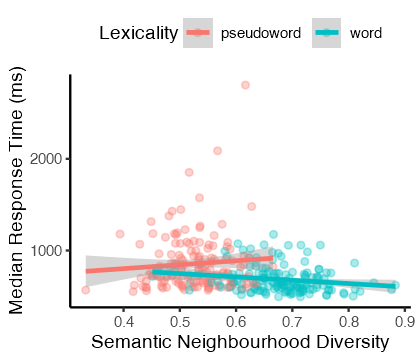

In [27]:
stim_averages |>
  ggplot(aes(snd, median_rt, colour=condition)) +
  geom_point(alpha = 0.33) +  # alpha sets point transparency
  geom_smooth(method = "lm", formula = y ~ x) +
  labs(
    x = "Semantic Neighbourhood Diversity",
    y = "Median Response Time (ms)",
    colour = "Lexicality"
  )